# Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
#for clasiification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

#for metrics
from sklearn import metrics
from sklearn import linear_model
# for removing warning msgs
import warnings 
warnings.filterwarnings('ignore')
#ensembling models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Loading dataset

In [17]:
concrete_df=pd.read_csv(r"C:\Users\TANA FOUNDATION\Downloads\Datasets-main\Datasets-main\concrete.csv")
concrete_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [25]:
concrete_df.shape

(1030, 9)

In [18]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [19]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [20]:
concrete_df.describe(include='all')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [22]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# Bivariant plots

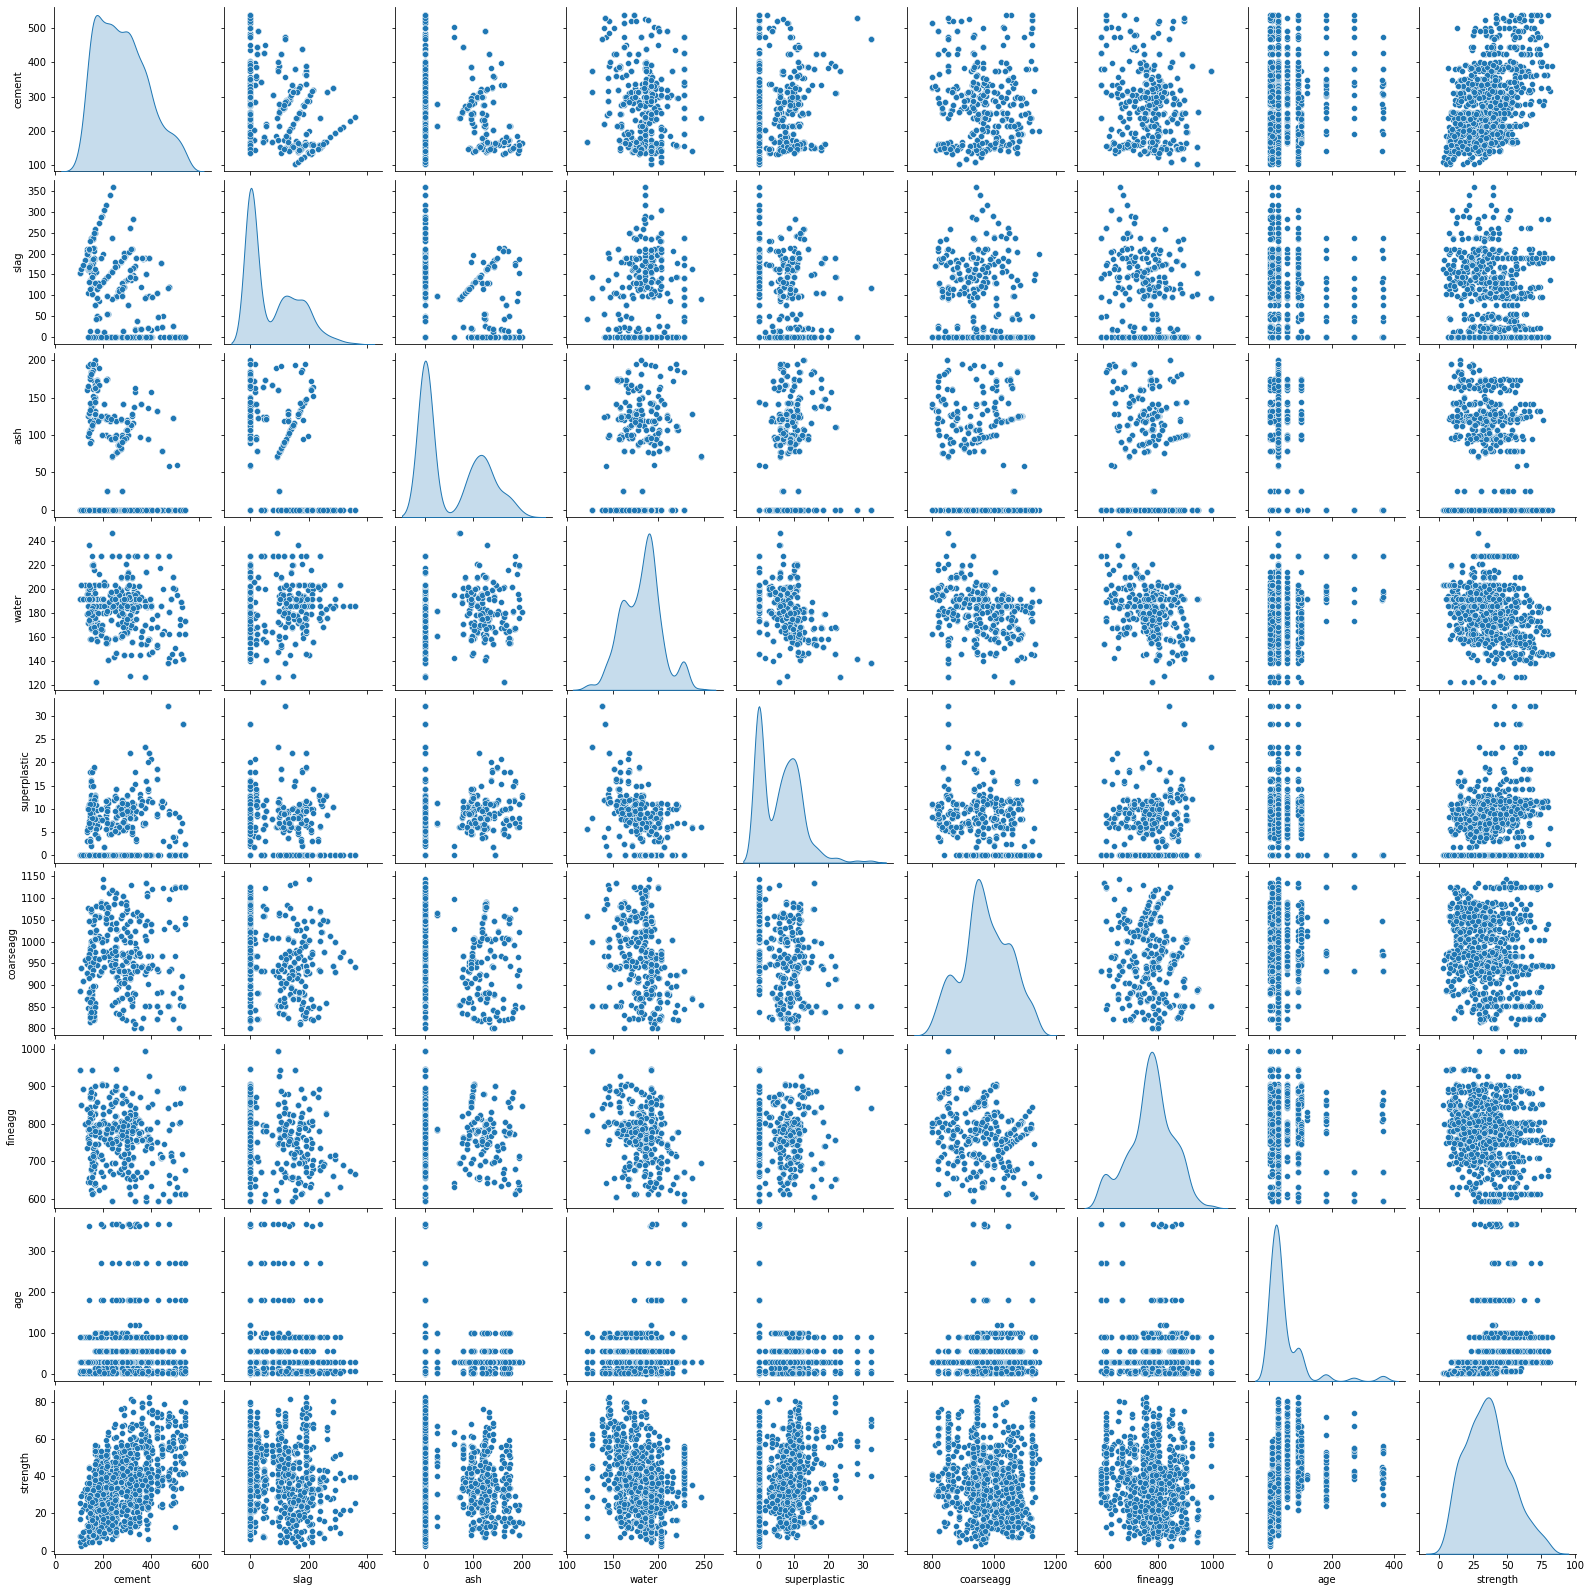

In [21]:
sns.pairplot(concrete_df,diag_kind='kde')

<AxesSubplot:xlabel='slag', ylabel='cement'>

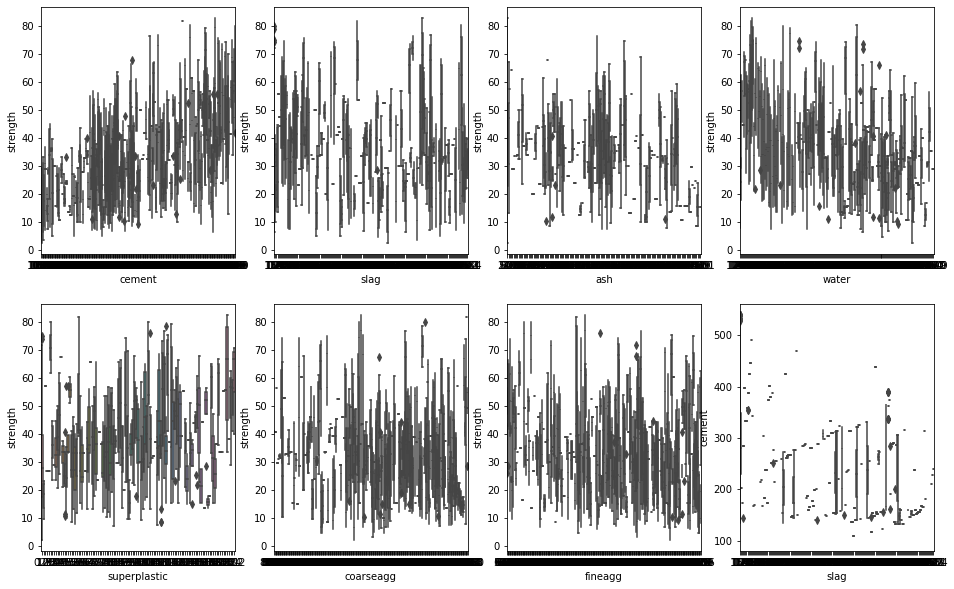

In [28]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.boxplot(x="cement",y="strength",data=concrete_df,ax=ax[0][0])
sns.boxplot(x="slag",y="strength",data=concrete_df,ax=ax[0][1])
sns.boxplot(x="ash",y="strength",data=concrete_df,ax=ax[0][2])
sns.boxplot(x="water",y="strength",data=concrete_df,ax=ax[0][3])
sns.boxplot(x="superplastic",y="strength",data=concrete_df,ax=ax[1][0])
sns.boxplot(x="coarseagg",y="strength",data=concrete_df,ax=ax[1][1])
sns.boxplot(x="fineagg",y="strength",data=concrete_df,ax=ax[1][2])
sns.boxplot(x='slag',y='cement',data=concrete_df,ax=ax[1][3])


array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fineagg'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

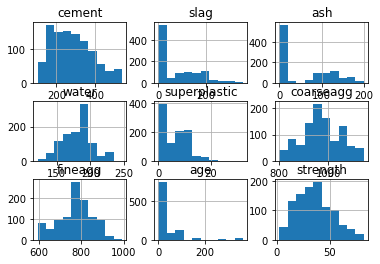

In [29]:
concrete_df.hist()


<AxesSubplot:>

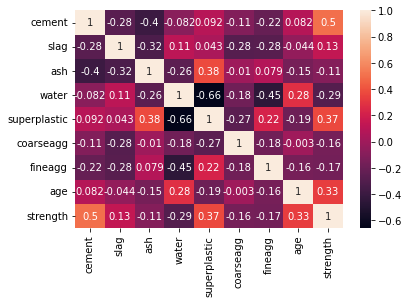

In [30]:
corr=concrete_df.corr()
sns.heatmap(corr,annot=True)


<AxesSubplot:xlabel='strength', ylabel='count'>

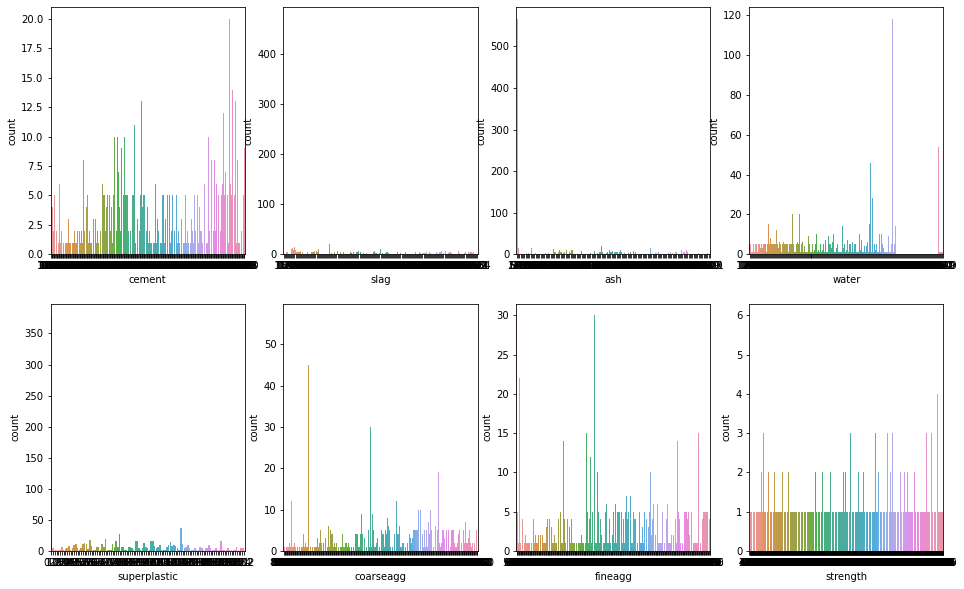

In [35]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot("cement",data=concrete_df,ax=ax[0][0])
sns.countplot("slag",data=concrete_df,ax=ax[0][1])
sns.countplot("ash",data=concrete_df,ax=ax[0][2])
sns.countplot("water",data=concrete_df,ax=ax[0][3])
sns.countplot("superplastic",data=concrete_df,ax=ax[1][0])
sns.countplot("coarseagg",data=concrete_df,ax=ax[1][1])
sns.countplot("fineagg",data=concrete_df,ax=ax[1][2])
sns.countplot("strength",data=concrete_df,ax=ax[1][3])


# Split  Data

In [38]:
# indepent variables
X=con_df.drop(['cement'],axis=1)
y=con_df[['cement']] #dependent variable

In [39]:
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.30,random_state=1)

In [40]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

# Train Data

In [41]:
model_1.score(X_train,y_train)

0.8903717468949981

# Test Data

In [42]:
model_1.score(X_test,y_test)

0.8813754542655792

checking with different Algorithm

In [43]:
#knn  regressor algorithm
knn=KNeighborsRegressor(n_neighbors=5,p=2) 
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train),knn.score(X_test,y_test))


0.930200932026245 0.8111097010448078


In [45]:
#randomforest regressor
rfc=RandomForestRegressor(n_estimators=5)
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train),rfc.score(X_test,y_test))


0.9810398435788139 0.8775984970671529


In [47]:
# decision tree regressor
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train),dt.score(X_test,y_test))



0.8388491985672208 0.7095387145470948


In [48]:
# adabooster regressor
adbm=AdaBoostRegressor()
adbm.fit(X_train,y_train)
print(adbm.score(X_train,y_train),adbm.score(X_test,y_test))

0.8361453372460463 0.7917772031171273


In [50]:
#gradientboosting  regressor algorithm
gbc=GradientBoostingRegressor(n_estimators=30)
gbc.fit(X_train,y_train)
print(gbc.score(X_train,y_train),gbc.score(X_test,y_test))


0.8930071582022177 0.8121482530699071


In [53]:
#bagging regressor
bgm=BaggingRegressor(n_estimators=50,base_estimator=dt)
bgm.fit(X_train,y_train)
print(bgm.score(X_train,y_train),bgm.score(X_test,y_test))


0.9128210188800091 0.8395134346255843
